# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under sample size constraints.

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## Let's get started!
  
To start, let's import the necessary libraries required for this simuation:.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis: 

    There is no difference between experimental and control means i.e. H0 is equal to H1

And the alternative Hypothesis:

    There is a difference between experimental and control means i.e. H0 is not equal to H1

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll a power analysis simulation.

In [2]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0
control_sd = 0.21

# Experimental group
experimental_mean = 0.17
experimental_sd = 0.21

#Set the number of simulations for our test = 1000
n_sim = 1000

You can now start running our simulations to run an independance t-test with above data and store the calculated p_value in our `p` array. Perform following tasks.

* Initialize a numpy array and fill it with Nan values for storing the results (p_value) of the independance T-test.
* For defined number of simulations (i.e. 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independant t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations and where Null hypothesis is rejected


In [3]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim
for i in range(n_sim):
    control = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
    experimental = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=sample_size)
    
    result = stats.ttest_ind(control, experimental)
    p[i] = result[1]
    
# number of null hypothesis rejections
num_null_rejects = np.sum(p < 0.05)
power = (num_null_rejects) / n_sim

power

# 0.495

0.495

These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experiment is 49%. This can be interpreted as follows:

> **If a large effect (.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research .8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of .17 or greater between the group means with an 80% power.

In [4]:
from statsmodels.stats.power import TTestPower
power = TTestPower()
power.solve_power(effect_size=0.17, alpha=0.05, power=0.8)

273.51381725963785

In [5]:
# required power 0.95
target = 0.8

In [6]:
# minimum sample size to start the simulations 
sample_size = 12
current = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initiliaze a list for storing samplesize x power summary
* While current power is less than target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size , power
    * increase the sample size by 1 and repeat

In [7]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

power_sample = []

# keep iterating as shown above until desired power is obtained
while current < target:
    control = np.empty([n_sim, sample_size])
    experimental = np.empty([n_sim, sample_size])
    
    control.fill(np.nan)
    experimental.fill(np.nan)
  
    control = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    experimental = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])

    result = stats.ttest_ind(control, experimental, axis=1)
    p = result[1]
    
    current = np.sum(p < 0.05) / n_sim
    
    print("Sample size: ", sample_size, " Current Power: ", current)
    power_sample.append([sample_size, current])
    
    sample_size += 1

Sample size:  12  Current Power:  0.4754
Sample size:  13  Current Power:  0.5066
Sample size:  14  Current Power:  0.5423
Sample size:  15  Current Power:  0.5767
Sample size:  16  Current Power:  0.6038
Sample size:  17  Current Power:  0.6297
Sample size:  18  Current Power:  0.658
Sample size:  19  Current Power:  0.6783
Sample size:  20  Current Power:  0.7056
Sample size:  21  Current Power:  0.7266
Sample size:  22  Current Power:  0.7481
Sample size:  23  Current Power:  0.7624
Sample size:  24  Current Power:  0.7864
Sample size:  25  Current Power:  0.8031


You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

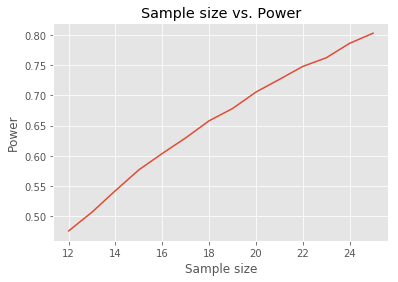

In [8]:
# Plot a sample size X Power line graph
plt.plot([i[0] for i in power_sample], [i[1] for i in power_sample])
plt.title('Sample size vs. Power')
plt.xlabel('Sample size')
plt.ylabel('Power')
plt.show()

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need considerably higher number of patients. 

## BONUS: Investigating the Relationship Between Power, Sample Size and Effect Size

You've seen how to calculate power given alpha, sample size and effect size. To further investigate this relationship, it is interesting to plot the relationship between power and sample size for various effect sizes. 

To do this, run multiple simulations for varying parameters. Then store the parameters and plot the resulting dataset. Specifically:

1. Use a value of $\alpha$ = 0.05 for all of your simulations
2. Use the following effect sizes: [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
3. Use the sample sizes from 10 to 500
4. For each effect size sample size combination, calculate the accompanying power
5. Plot a line graph of the power vs sample size relationship. You should have 7 plots; one for each of the effect sizes listed above. All 7 plots can be on the same graph, but should be labelled appropriately. Plot the power on the y-axis and sample size on the x-axis.

In [9]:
# Control group
control_mean = 0
control_sd = 0.21

# Experimental group
effect_sizes = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
experimental_sd = 0.21

alpha = 0.05
n_sim = 10000

min_sample_size = 10
max_sample_size = 500

data = {}

# keep iterating as shown above until desired power is obtained
for i in range(len(effect_sizes)):
    sample_size = min_sample_size
    current = 0
    power_sample = []
    print("Effect size: ", effect_sizes[i])
    
    while sample_size <= max_sample_size:
        control = np.empty([n_sim, sample_size])
        experimental = np.empty([n_sim, sample_size])

        control.fill(np.nan)
        experimental.fill(np.nan)

        control = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
        experimental = np.random.normal(loc=effect_sizes[i], scale=experimental_sd, size=[n_sim, sample_size])

        result = stats.ttest_ind(control, experimental, axis=1)
        p = result[1]

        power = np.sum(p < alpha) / n_sim

#         print("Sample size: ", sample_size, " Current Power: ", power)
        power_sample.append([sample_size, power])

        sample_size += 1
    data[i] = power_sample
#     print("\n")

Effect size:  0.01
Effect size:  0.05
Effect size:  0.1
Effect size:  0.15
Effect size:  0.2
Effect size:  0.3
Effect size:  0.5


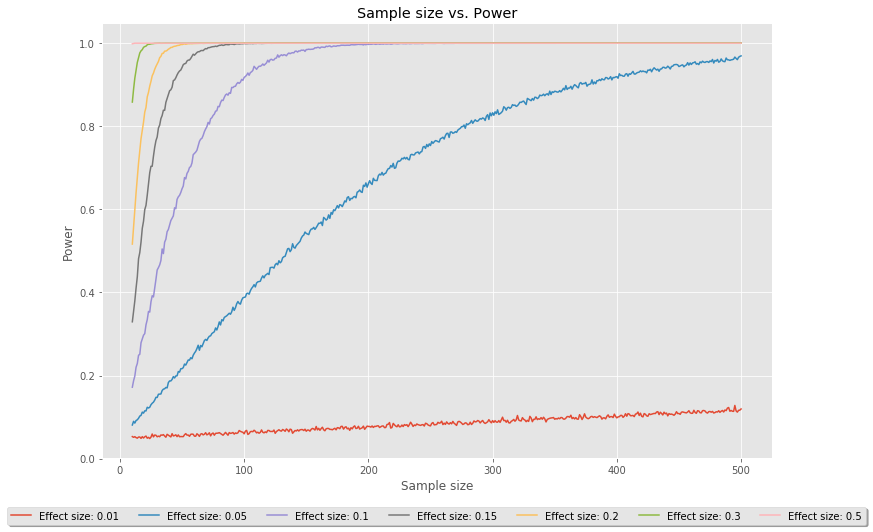

In [10]:
# Plot a sample size X Power line graph
plt.figure(figsize=(12,8))
for effect_size in data:
    plt.plot([i[0] for i in data[effect_size]], 
             [i[1] for i in data[effect_size]], 
             label= 'Effect size: '+str(effect_sizes[effect_size]))

plt.title('Sample size vs. Power')
plt.xlabel('Sample size')
plt.ylabel('Power')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=7)
plt.show()

## Summary

In this lesson, you gained further practice with "statistical power" and how it can be used to analyze experimental design. You ran a simulation to determine the sample size that would provide a given value of power (for a given alpha and effect size). Running simulations like this as well as further investigations regarding required sample sizes for higher power thresholds or smaller effect sizes is critical in designing meaningful experiments where one can be confident in the subsequent conclusions drawn.